In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(HTML cross)(3).csv")
data

,labels,mlp_prediction_non,mlp_prediction_phish,nn_prediction_non,nn_prediction_phish,nn2_prediction_non,nn2_prediction_phish
0,0,1.000000,4.632784e-21,1.000000,4.632784e-21,1.000000,4.632784e-21
1,0,1.000000,1.834090e-139,1.000000,1.834090e-139,1.000000,1.834090e-139
2,0,0.277758,7.222416e-01,0.277758,7.222416e-01,0.277758,7.222416e-01
3,1,0.303680,6.963204e-01,0.303680,6.963204e-01,0.303680,6.963204e-01
4,0,1.000000,2.524615e-08,1.000000,2.524615e-08,1.000000,2.524615e-08
...,...,...,...,...,...,...,...
2933,1,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00
2934,0,0.168642,8.313583e-01,0.168642,8.313583e-01,0.168642,8.313583e-01
2935,1,0.121343,8.786575e-01,0.121343,8.786575e-01,0.121343,8.786575e-01
2936,1,1.000000,5.691714e-09,1.000000,5.691714e-09,1.000000,5.691714e-09


In [4]:
data.shape

(2938, 7)

In [5]:
data.columns

Index(['labels', 'mlp_prediction_non', 'mlp_prediction_phish',
       'nn_prediction_non', 'nn_prediction_phish', 'nn2_prediction_non',
       'nn2_prediction_phish'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                2938 non-null   int64  
 1   mlp_prediction_non    2938 non-null   float64
 2   mlp_prediction_phish  2938 non-null   float64
 3   nn_prediction_non     2938 non-null   float64
 4   nn_prediction_phish   2938 non-null   float64
 5   nn2_prediction_non    2938 non-null   float64
 6   nn2_prediction_phish  2938 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 160.8 KB


In [7]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(2938, 6) (2938,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  #create model
  model = Sequential()
  model.add(Dense(5, input_dim=6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  cm
  tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  print('True Positive', tp)
  print('True Negative', tn)
  print('False Positive', fp)
  print('False Negative', fn)

  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))

  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6353 - accuracy: 0.7920 - val_loss: 0.5925 - val_accuracy: 0.7959
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.7961 - val_loss: 0.5254 - val_accuracy: 0.7959
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.7980 - val_loss: 0.4905 - val_accuracy: 0.7959
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7980 - val_loss: 0.4718 - val_accuracy: 0.8061
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.8064 - val_loss: 0.4582 - val_accuracy: 0.8265
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8037 - val_loss: 0.4494 - val_accuracy: 0.8129
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8075 - val_loss: 0.4433 - val_accuracy: 0.8061
Epoch 8/100
8

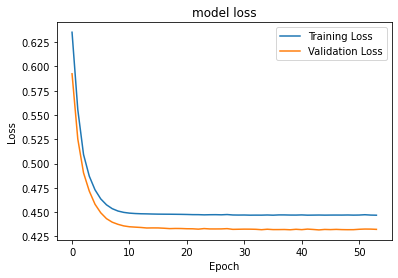

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       225
           1       0.58      0.64      0.61        69

    accuracy                           0.81       294
   macro avg       0.73      0.75      0.74       294
weighted avg       0.81      0.81      0.81       294

Accuracy: 0.8061224489795918
True Positive 44
True Negative 193
False Positive 32
False Negative 25
Precision: 0.5789
Recall: 0.6377
F1 Score: 0.6069
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.7712 - val_loss: 0.4549 - val_accuracy: 0.7619
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7950 - val_loss: 0.4442 - val_accuracy: 0.7891
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8041 - val_loss: 0.4416 - val_accuracy: 0.7925
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.447

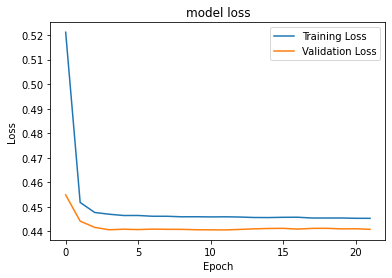

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       222
           1       0.56      0.69      0.62        72

    accuracy                           0.79       294
   macro avg       0.72      0.76      0.74       294
weighted avg       0.81      0.79      0.80       294

Accuracy: 0.7891156462585034
True Positive 50
True Negative 182
False Positive 40
False Negative 22
Precision: 0.5556
Recall: 0.6944
F1 Score: 0.6173
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.5953 - accuracy: 0.7795 - val_loss: 0.5360 - val_accuracy: 0.7653
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7946 - val_loss: 0.4919 - val_accuracy: 0.8129
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8056 - val_loss: 0.4863 - val_accuracy: 0.8129
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.443

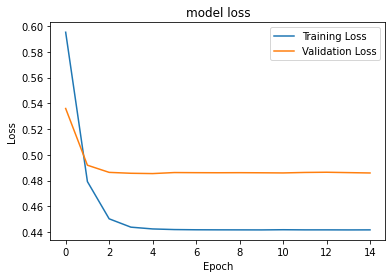

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       211
           1       0.66      0.58      0.62        83

    accuracy                           0.80       294
   macro avg       0.75      0.73      0.74       294
weighted avg       0.79      0.80      0.79       294

Accuracy: 0.7959183673469388
True Positive 48
True Negative 186
False Positive 25
False Negative 35
Precision: 0.6575
Recall: 0.5783
F1 Score: 0.6154
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.4774 - accuracy: 0.7787 - val_loss: 0.4219 - val_accuracy: 0.8333
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7988 - val_loss: 0.4133 - val_accuracy: 0.8265
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8094 - val_loss: 0.4132 - val_accuracy: 0.7959
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.449

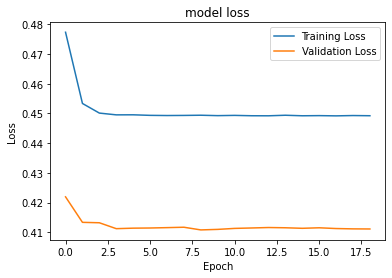

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       234
           1       0.50      0.58      0.54        60

    accuracy                           0.80       294
   macro avg       0.69      0.72      0.70       294
weighted avg       0.81      0.80      0.80       294

Accuracy: 0.7959183673469388
True Positive 35
True Negative 199
False Positive 35
False Negative 25
Precision: 0.5000
Recall: 0.5833
F1 Score: 0.5385
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6397 - accuracy: 0.7568 - val_loss: 0.5890 - val_accuracy: 0.7449
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7568 - val_loss: 0.5316 - val_accuracy: 0.7449
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7568 - val_loss: 0.5056 - val_accuracy: 0.7449
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.482

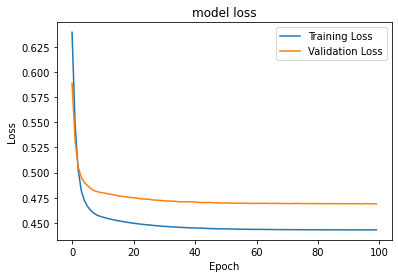

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       219
           1       0.59      0.60      0.60        75

    accuracy                           0.79       294
   macro avg       0.73      0.73      0.73       294
weighted avg       0.79      0.79      0.79       294

Accuracy: 0.7925170068027211
True Positive 45
True Negative 188
False Positive 31
False Negative 30
Precision: 0.5921
Recall: 0.6000
F1 Score: 0.5960
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5863 - accuracy: 0.7269 - val_loss: 0.4820 - val_accuracy: 0.7993
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7958 - val_loss: 0.4387 - val_accuracy: 0.8095
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7958 - val_loss: 0.4323 - val_accuracy: 0.8095
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.448

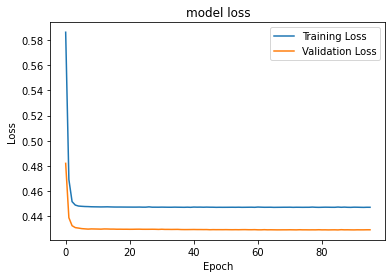

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       226
           1       0.58      0.62      0.60        68

    accuracy                           0.81       294
   macro avg       0.73      0.74      0.74       294
weighted avg       0.81      0.81      0.81       294

Accuracy: 0.8095238095238095
True Positive 42
True Negative 196
False Positive 30
False Negative 26
Precision: 0.5833
Recall: 0.6176
F1 Score: 0.6000
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6845 - accuracy: 0.6112 - val_loss: 0.6325 - val_accuracy: 0.8299
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7939 - val_loss: 0.6073 - val_accuracy: 0.8333
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.7950 - val_loss: 0.5892 - val_accuracy: 0.8333
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.593

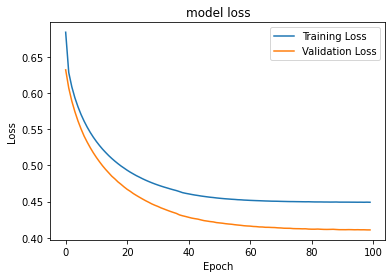

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       223
           1       0.67      0.62      0.64        71

    accuracy                           0.83       294
   macro avg       0.77      0.76      0.77       294
weighted avg       0.83      0.83      0.83       294

Accuracy: 0.8333333333333334
True Positive 44
True Negative 201
False Positive 22
False Negative 27
Precision: 0.6667
Recall: 0.6197
F1 Score: 0.6423
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5918 - accuracy: 0.7349 - val_loss: 0.5309 - val_accuracy: 0.7789
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8022 - val_loss: 0.4900 - val_accuracy: 0.7687
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7992 - val_loss: 0.4763 - val_accuracy: 0.7687
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.451

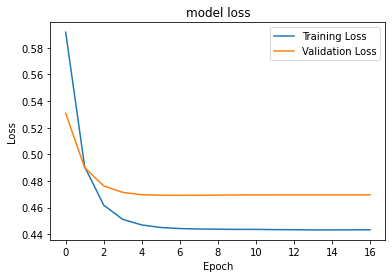

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       218
           1       0.57      0.61      0.59        76

    accuracy                           0.78       294
   macro avg       0.71      0.72      0.72       294
weighted avg       0.78      0.78      0.78       294

Accuracy: 0.7789115646258503
True Positive 46
True Negative 183
False Positive 35
False Negative 30
Precision: 0.5679
Recall: 0.6053
F1 Score: 0.5860
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5801 - accuracy: 0.6972 - val_loss: 0.5065 - val_accuracy: 0.7474
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7580 - val_loss: 0.4780 - val_accuracy: 0.7713
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7841 - val_loss: 0.4728 - val_accuracy: 0.7952
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.445

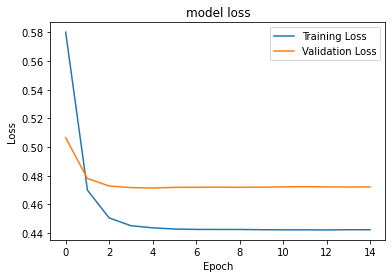

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       219
           1       0.59      0.57      0.58        74

    accuracy                           0.79       293
   macro avg       0.72      0.72      0.72       293
weighted avg       0.79      0.79      0.79       293

Accuracy: 0.7918088737201365
True Positive 42
True Negative 190
False Positive 29
False Negative 32
Precision: 0.5915
Recall: 0.5676
F1 Score: 0.5793
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5209 - accuracy: 0.7550 - val_loss: 0.4706 - val_accuracy: 0.7611
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7550 - val_loss: 0.4498 - val_accuracy: 0.7611
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7550 - val_loss: 0.4424 - val_accuracy: 0.7611
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.454

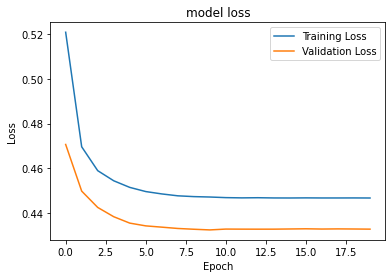

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       223
           1       0.56      0.69      0.62        70

    accuracy                           0.80       293
   macro avg       0.73      0.76      0.74       293
weighted avg       0.81      0.80      0.80       293

Accuracy: 0.7952218430034129
True Positive 48
True Negative 185
False Positive 38
False Negative 22
Precision: 0.5581
Recall: 0.6857
F1 Score: 0.6154
Average Validation Accuracy: 0.7988391260941236


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0

kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

